In [1]:
import pandas as pd
import numpy as np

In [4]:
movies = pd.read_csv('movies_stats.csv')

In [23]:
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


В переменную years запишем список из всех годов с 1950-го по 2010-й

In [30]:
years = list(range(1950, 2011))

Напишим функцию production_year, которая каждой строке из названия фильма выставляет год выпуска (год выпуска берём из столбца title). Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

- для каждой строки пройдем по всем годам списка years;
- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска;
- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год.

In [41]:
def production_year (movie_title):
    for year in years:
        if str(year) in movie_title: 
            return year
    return 1900


Запишим год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

In [42]:
movies['year'] = movies['title'].apply(production_year)
movies.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


Посчитаем средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируем результат по убыванию рейтинга. Воспользуемся группировкой

In [53]:
movies.groupby('year').mean()[['rating']].sort_values(by = 'rating' ,ascending=False).reset_index()

,year,rating
0,1957,4.014241
1,1972,4.011136
2,1952,4.000000
3,1954,3.994220
4,1951,3.983539
...,...,...
57,2005,3.448434
58,2003,3.444777
59,1996,3.426600
60,1997,3.415764


Этого нет в задании, но мне стало интересно, почему рейтинги старых фильмов лучше
Проиллюстрируем результат простым графиком

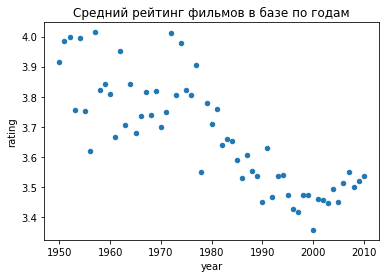

In [79]:
rating_by_year = movies.groupby('year').mean()[['rating']].sort_values(by = 'rating' ,ascending=False).reset_index()
rating_by_year[rating_by_year['year']!=1900].plot(x = 'year', y = 'rating', title='Средний рейтинг фильмов в базе по годам', kind = 'scatter')

Тренд на снижение среднего рейтинга с годами налицо. Впрочем, это может быть связано с тем, что в базе из старых фильмов представлены, действительно, только лучшие, а новых фильмов в базе просто много - и хороших, и плохих. Посчитаем, сколько фильмов в базе по годам и убедимся, старых фильмов в базе мало и что средний по году рейтинг зависит негативно от количества фильмов этого года в базе  

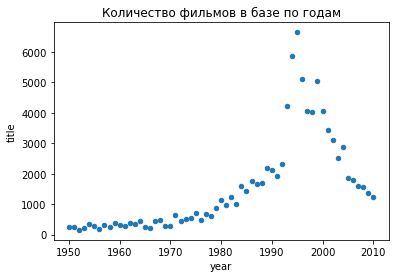

In [80]:
count_by_year = movies.groupby('year').count()[['title']].sort_values(by = 'title' ,ascending=False).reset_index()
count_by_year[count_by_year['year']!=1900].plot(x = 'year', y = 'title', title='Количество фильмов в базе по годам' , kind = 'scatter')

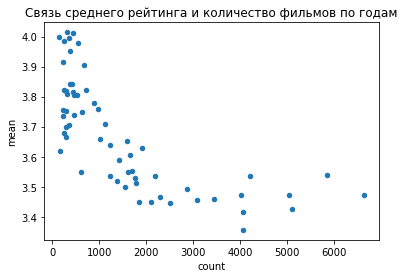

In [81]:
count_vs_rating = movies.groupby('year').agg(['count', 'mean'])['rating'].reset_index()
count_vs_rating[count_vs_rating['year']!=1900].plot(x = 'count', y = 'mean', title='Связь среднего рейтинга и количество фильмов по годам' , kind = 'scatter')